In [12]:
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.Utility import *
from TO_sim.Utility import *
from TO_sim.To_Draw import *
import numpy as np
import matplotlib.pyplot as plt
import parmap
DF = 'Review/22.10.05/'
Create_Folder(DF)

# uniform 분포에서의 omega와, mapping

In [17]:
N = 500
seed = 'uniform'
theta_init, omega_init, Kc = Quantile_Lorentzian(N, 0, 1, seed=seed)
dtheta_init = np.zeros(N)
dK = 0.1
omega   =   omega_init
K_append = np.arange(0,2+dK/2,dK)
# theta_init = np.zeros(N)
t_end = 1600
dt = 0.1
# @timing
def Check_rk4_dt(K,m):
    theta_s, dtheta_s, omega, rs, t = Sol_Kuramoto_mf(N,K,m,(0, t_end),dt=dt,
                p_theta=theta_init,
                p_dtheta=dtheta_init,
                p_omega=omega_init,
                distribution="Normal",)
    return t, rs


In [3]:
t_uniform,omega,_ = Quantile_Lorentzian(N, 0, 1, seed=seed)
t_12,_,_ = Quantile_Lorentzian(N, 0, 1, seed=12)
t_15,_,_ = Quantile_Lorentzian(N, 0, 1, seed=15)

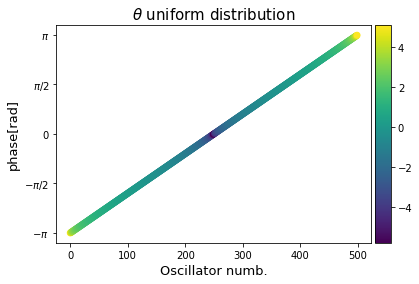

In [34]:
idx = list(range(0,N,1))
fig = plt.figure()
sca = plt.scatter(idx,t_12,c=np.log(abs(omega)))
A = np.log(abs(omega))

plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],['$-\pi$','$-\pi/2$',0,'$\pi/2$','$\pi$']);
plt.ylabel('phase[rad]',fontsize=13)
plt.xlabel('Oscillator numb.',fontsize=13)
plt.title(r'$\theta$ uniform distribution',fontsize=15)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
cbar.set_label(r'$log(|\omega|)$')

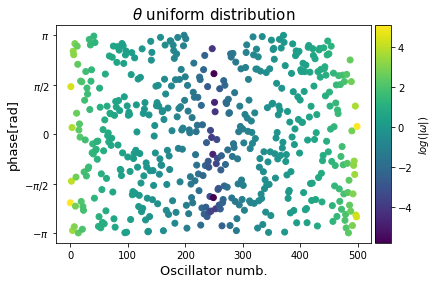

In [46]:
idx = list(range(0,N,1))
fig = plt.figure()
sca = plt.scatter(idx,t_12,c=np.log(abs(omega)))
A = np.log(abs(omega))

plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],['$-\pi$','$-\pi/2$',0,'$\pi/2$','$\pi$']);
plt.ylabel('phase[rad]',fontsize=13)
plt.xlabel('Oscillator numb.',fontsize=13)
plt.title(r'$\theta$ uniform distribution',fontsize=15)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
cbar.set_label(r'$log(|\omega|)$')

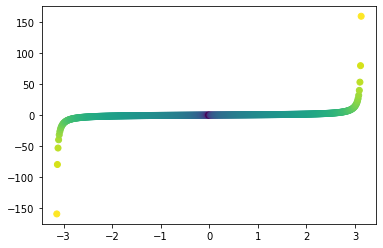

In [50]:
plt.scatter(t_uniform,omega,c=np.log(abs(omega)))

In [14]:
def draw_theta_omega(theta,seed):
    fig = plt.figure()
    sca = plt.scatter(theta,omega,c=omega,vmin=-4,vmax=4)
    plt.ylim(-4,4)
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
    cbar.set_label(r'$\omega$(natural frequency)',fontsize=13)
    ax.set_xlabel(r'$\theta$[rad](phase)',fontsize=13)
    ax.set_ylabel(r'$\omega$[rad/s]'+'\n (natural frequency)',fontsize=13)
    ax.set_title(r'$\theta$ vs $\omega$'+r', $\theta$'+f' distribution = {seed}',fontsize=15)
    fig.tight_layout()
    return fig

In [18]:
np.random.shuffle(theta_init)

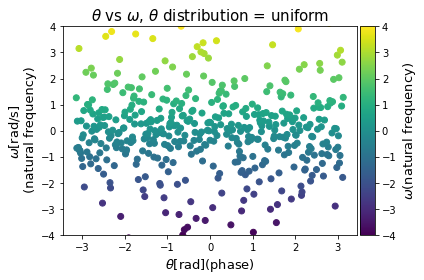

In [19]:
fig = draw_theta_omega(theta_init,'uniform')
# fig.savefig(DF + 'uniform distribution.png',dpi = 400)

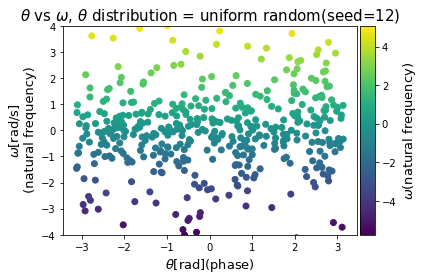

In [84]:
name = 'uniform random(seed=12)'
fig = draw_theta_omega(t_12,name)
fig.savefig(DF + name+'.png',dpi = 400)

(-4.0, 4.0)

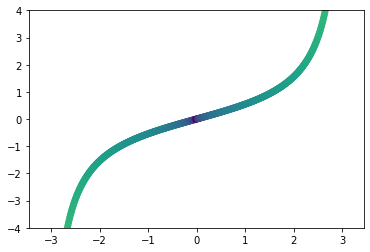

In [54]:
plt.scatter(t_12,omega,c=omega,vmin=-4,vmax=4)
plt.ylim(-4,4)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
cbar.set_label(r'$\omega$(natural frequency)',fontsize=13)
ax.set_xlabel(r'$\theta$[rad](phase)',fontsize=13)
ax.set_ylabel(r'$\omega$[rad/s]'+'\n (natural frequency)',fontsize=13)
ax.set_title(r'$\theta$ vs $\omega$',fontsize=15)

## shuffle uniform distribution

In [43]:
N = 500
seed = 'uniform shuffle'
theta_init, omega_init, Kc = Quantile_Lorentzian(N, 0, 1, seed=seed)
dtheta_init = np.zeros(N)
seed2 = 7
np.random.seed(seed2)
np.random.shuffle(theta_init)
dK = 0.1
K_append = np.arange(0,2+dK/2,dK)
# theta_init = np.zeros(N)
t_end = 1600
dt = 0.1
# @timing
def Check_rk4_dt(K,m):
    theta_s, dtheta_s, omega, rs, t = Sol_Kuramoto_mf(N,K,m,(0, t_end),dt=dt,
                p_theta=theta_init,
                p_dtheta=dtheta_init,
                p_omega=omega_init,
                distribution="Normal",)
    return t, rs


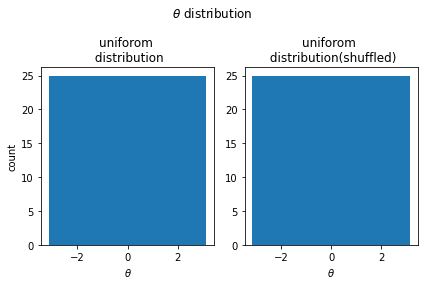

In [15]:
plt.subplot(121)
plt.hist(theta_init,bins=20);
plt.title(f'uniforom \n distribution')
plt.ylabel('count')
plt.xlabel(r'$\theta$')
plt.subplot(122)
t_shuffle = theta_init.copy()
np.random.shuffle(t_shuffle)
plt.hist(t_shuffle,bins=20);
plt.title(f'uniforom \n distribution(shuffled)')
plt.suptitle(r"$\theta$ distribution")
plt.xlabel(r'$\theta$')

plt.tight_layout()
plt.savefig(DF+'theta distribution uniform + uniform shuffle.png',dpi=400)


In [23]:
def check_case1_KR(m):
    Ks = np.linspace(0.1,6,1000)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    min_KF = min(KF)
    min_RF = min(RF)
    return min_KF,min_RF
func_case1 = np.vectorize(check_case1_KR)

NameError: name 'RTMset' is not defined

In [44]:
K_append = np.arange(0,4+0.1/2,0.1)
mset = np.array([0.95,2,6])
Kset = func_case1(mset)

RTMset = [[Check_rk4_dt(K+Kp,m) for Kp in tqdm(K_append)] for K,m in zip(Kset[0],mset)]
Slack_Notification()

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

In [25]:
def make_sec_mean(rs,sec,dt,start,end):
    interval = int(sec/dt)
    len_rs = len(rs)
    partition = len_rs//interval
    make_partition = lambda x: rs[x*interval:x*interval+interval]
    PART = np.arange(partition)
    rss = [make_partition(x) for x in PART]
    mean_rss = list(map(np.mean,rss))
    mean_times = PART*sec
    start_idx, end_idx =np.searchsorted(mean_times,[start,end])
    return mean_times[start_idx:end_idx], mean_rss[start_idx:end_idx]

Kc,R(Kc),K_plus
3.0529529529529533 0.5580198808485322 0.0 3.0529529529529533
2.4151151151151153 0.33500140958564995 1.2000000000000002 3.6151151151151155
2.243843843843844 0.11893862983705479 2.5 4.743843843843845


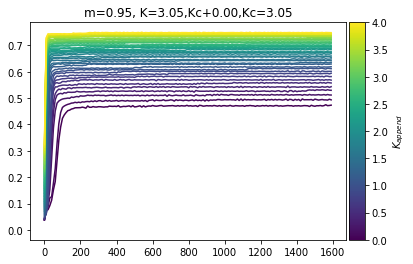

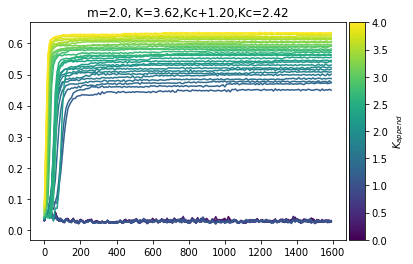

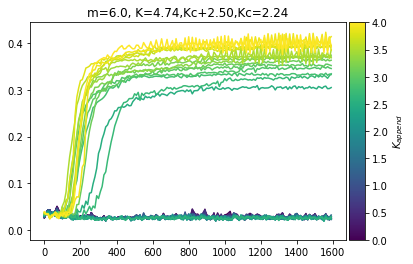

In [50]:
show_s = 0
show_e = 1600
mean_time = 10

print('Kc,R(Kc),K_plus')
for i,m in enumerate(mset):
    plt.figure()
    color_idx = np.linspace(0,1,len(K_append))
    color = plt.cm.viridis(color_idx)
    sca = plt.scatter(np.zeros(len(RTMset[i])),np.zeros(len(RTMset[i])),c=K_append,s=0)
    num = 0
    for j,(t,r) in enumerate(RTMset[i]):
        ts,rs = make_sec_mean(r,mean_time,dt,show_s,show_e)
        if max(rs)>0.2 and num ==0:
            print(Kset[0][i],Kset[1][i],K_append[j],Kset[0][i]+K_append[j]);num+=1
            plt.plot(ts,rs,label=f'Kp={K_append[j]:.02f}',color =color[j])
            that_K = Kset[0][i]+K_append[j]
            plt.title(f'm={m}, K={that_K:.02f},Kc+{K_append[j]:.02f},Kc={Kset[0][i]:.02f}')
        else:
            plt.plot(ts,rs,label=f'Kp={K_append[j]:.02f}',color =color[j])
            pass
            
        # plt.plot(t,r,label=f'Kp={K_append[j]:.02f}',color =color[j])
    # plt.legend(loc=2)
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
    cbar.set_label('$K_{append}$')
    plt.xlabel('time [s]')
    plt.xlabel('r(order parameter)')
    # plt.colorbar()
    plt.savefig(DF+f'N={N},m={m},K_append,seed={seed}{seed2}.png',dpi=400)
    # plt.savefig(DF+f'N={N},m={m},K_append,single,seed={seed}{seed2}.png',dpi=400)
    # plt.title(f'm={m}')